<a href="https://colab.research.google.com/github/dnmquan1110/SMS-Spam-Detection/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! mkdir ~/.kaggle
! cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! pip install kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
! kaggle datasets download uciml/sms-spam-collection-dataset

sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip '/content/sms-spam-collection-dataset.zip'

Archive:  /content/sms-spam-collection-dataset.zip
replace spam.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
df.rename(columns={'v1':'label','v2':'sms'},inplace=True)
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.drop_duplicates(inplace=True)

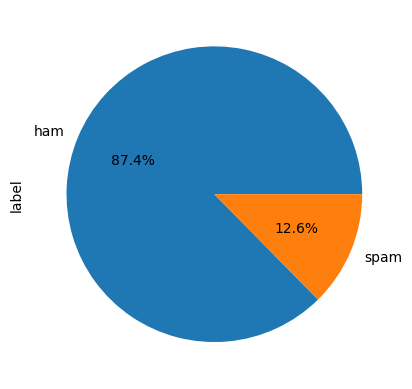

In [11]:
df.label.value_counts().plot.pie(autopct='%1.1f%%');

In [12]:
df['label'] = df['label'].map(lambda x: 1 if x=='ham' else 0)

In [13]:
df['len_sms'] = df['sms'].map(lambda x: len(x.split()))

In [14]:
df.head()

,label,sms,len_sms
0,1,"Go until jurong point, crazy.. Available only ...",20
1,1,Ok lar... Joking wif u oni...,6
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,1,U dun say so early hor... U c already then say...,11
4,1,"Nah I don't think he goes to usf, he lives aro...",13


In [15]:
corpus = set()
for sen in df['sms']:
  for word in sen.split():
    corpus.add(word)
print(len(corpus))

15585


In [16]:
from sklearn.model_selection import train_test_split
X = df['sms']
y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3876,), (3876,), (1293,), (1293,))

## Baseline model

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import classification_report,accuracy_score

tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec,X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)

mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
mnb.fit(X_train_vec,y_train)
gnb.fit(X_train_vec.toarray(),y_train)
bnb.fit(X_train_vec,y_train)

BernoulliNB()

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

0.9643962848297214
              precision    recall  f1-score   support

           0       1.00      0.65      0.78       186
           1       0.94      1.00      0.97      1107

    accuracy                           0.95      1293
   macro avg       0.97      0.82      0.88      1293
weighted avg       0.95      0.95      0.94      1293



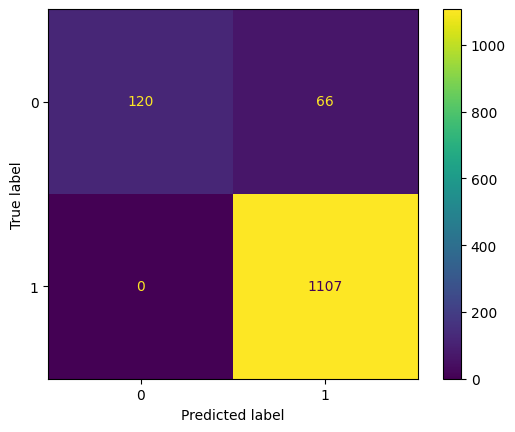

In [19]:
print(accuracy_score(y_train,mnb.predict(X_train_vec)))
print(classification_report(y_test,mnb.predict(X_test_vec)))
ConfusionMatrixDisplay.from_estimator(mnb,X_test_vec,y_test)

0.957172342621259
              precision    recall  f1-score   support

           0       0.61      0.84      0.70       186
           1       0.97      0.91      0.94      1107

    accuracy                           0.90      1293
   macro avg       0.79      0.87      0.82      1293
weighted avg       0.92      0.90      0.91      1293



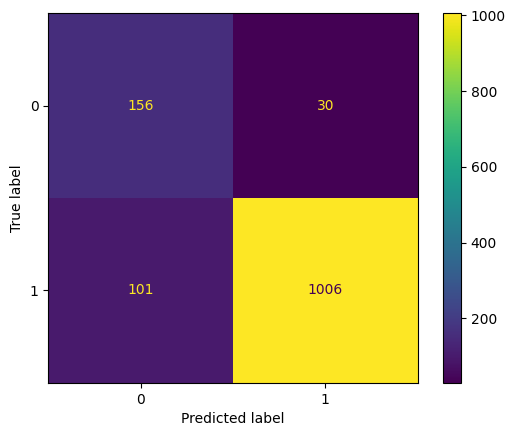

In [20]:
print(accuracy_score(y_train,gnb.predict(X_train_vec.toarray())))
print(classification_report(y_test,gnb.predict(X_test_vec.toarray())))
ConfusionMatrixDisplay.from_estimator(gnb,X_test_vec.toarray(),y_test)

0.9868421052631579
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       186
           1       0.97      1.00      0.98      1107

    accuracy                           0.97      1293
   macro avg       0.98      0.91      0.94      1293
weighted avg       0.97      0.97      0.97      1293



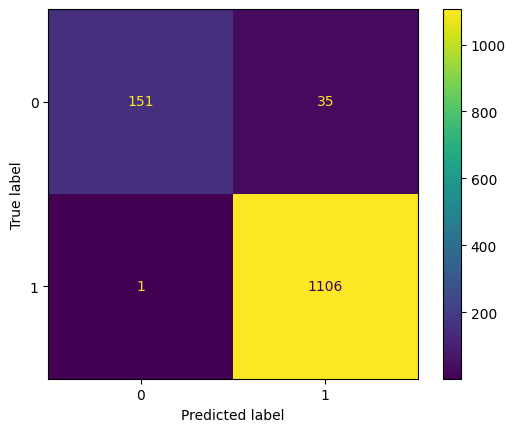

In [21]:
print(accuracy_score(y_train,bnb.predict(X_train_vec)))
print(classification_report(y_test,bnb.predict(X_test_vec)))
ConfusionMatrixDisplay.from_estimator(bnb,X_test_vec,y_test)

## Text vectorizer

In [22]:
from tensorflow.keras.layers import TextVectorization

MAX_TOKENS = len(corpus)
AVG_SEN = round(df['len_sms'].mean())

text_vectorizer = TextVectorization(
    max_tokens = MAX_TOKENS,
    standardize = 'lower_and_strip_punctuation',
    output_mode='int',
    output_sequence_length=AVG_SEN
)
text_vectorizer.adapt(X_train)

## Custom neural network model

In [23]:
from tensorflow import keras
from keras import layers
c_model = keras.Sequential(
    [
        layers.Input(shape=(1,),dtype='string'),
        text_vectorizer,
        layers.Embedding(
            input_dim=MAX_TOKENS,
            output_dim=AVG_SEN,
            embeddings_initializer='uniform',
            input_length=AVG_SEN
        ),
        layers.GlobalAveragePooling1D(),
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(1,activation='sigmoid')
    ]
)
c_model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(label_smoothing=0.6),metrics='accuracy')
c_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 15, 15)            233775    
                                                                 
 global_average_pooling1d (  (None, 15)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 flatten (Flatten)           (None, 15)                0         
                                                                 
 dense (Dense)               (None, 64)                1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 6

Epoch 1/5
122/122 [==============================] - 2s 9ms/step - loss: 0.6478 - accuracy: 0.8808 - val_loss: 0.6282 - val_accuracy: 0.9319
Epoch 2/5
122/122 [==============================] - 1s 7ms/step - loss: 0.6194 - accuracy: 0.9747 - val_loss: 0.6190 - val_accuracy: 0.9722
Epoch 3/5
122/122 [==============================] - 1s 7ms/step - loss: 0.6152 - accuracy: 0.9884 - val_loss: 0.6182 - val_accuracy: 0.9753
Epoch 4/5
122/122 [==============================] - 1s 6ms/step - loss: 0.6136 - accuracy: 0.9923 - val_loss: 0.6180 - val_accuracy: 0.9776
Epoch 5/5
122/122 [==============================] - 1s 6ms/step - loss: 0.6126 - accuracy: 0.9959 - val_loss: 0.6180 - val_accuracy: 0.9776


<Axes: >

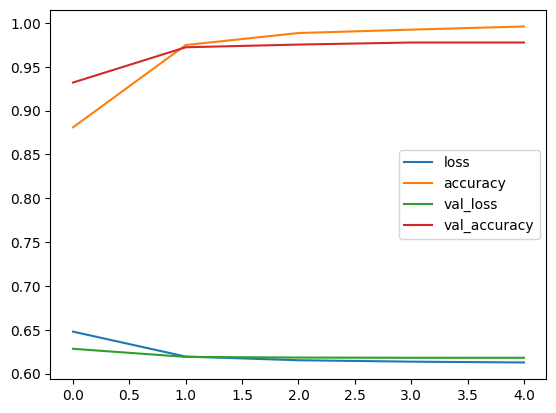

In [24]:
his = c_model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))
pd.DataFrame(his.history).plot()

In [25]:
from sklearn.metrics import precision_score,recall_score,f1_score

def evaluate_model(model,X,y):
  y_pred = np.round(model.predict(X))
  accuracy = accuracy_score(y,y_pred)
  precision = precision_score(y,y_pred)
  recall = recall_score(y,y_pred)
  f1 = f1_score(y,y_pred)

  model_results = {
      'accuracy': accuracy,
      'precision': precision,
      'recall': recall,
      'f1-score': f1
  }
  return model_results

evaluate_model(c_model,X_test,y_test)

41/41 [==============================] - 0s 2ms/step


{'accuracy': 0.9775715390564579,
 'precision': 0.9778368794326241,
 'recall': 0.996386630532972,
 'f1-score': 0.9870246085011186}

## Bidirectional LSTM model

In [26]:
bi_lstm_model = keras.Sequential(
     [
         layers.Input(shape=(1,),dtype='string'),
         text_vectorizer,
         layers.Embedding(
             input_dim=MAX_TOKENS,
             output_dim=AVG_SEN,
             embeddings_initializer='uniform',
             input_length=AVG_SEN
         ),
         layers.Bidirectional(layers.LSTM(128,activation='tanh',return_sequences=True)),
         layers.Bidirectional(layers.LSTM(128)),
         layers.Flatten(),
         layers.Dropout(.2),
         layers.Dense(64,activation='relu'),
         layers.Dense(1,activation='sigmoid')
     ]
 )

bi_lstm_model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
bi_lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 15, 15)            233775    
                                                                 
 bidirectional (Bidirection  (None, 15, 256)           147456    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                      

Epoch 1/5
122/122 [==============================] - 27s 144ms/step - loss: 0.2007 - accuracy: 0.9327 - val_loss: 0.0868 - val_accuracy: 0.9683
Epoch 2/5
122/122 [==============================] - 18s 144ms/step - loss: 0.0491 - accuracy: 0.9866 - val_loss: 0.0741 - val_accuracy: 0.9745
Epoch 3/5
122/122 [==============================] - 17s 142ms/step - loss: 0.0205 - accuracy: 0.9948 - val_loss: 0.0980 - val_accuracy: 0.9706
Epoch 4/5
122/122 [==============================] - 17s 142ms/step - loss: 0.0121 - accuracy: 0.9964 - val_loss: 0.0952 - val_accuracy: 0.9683
Epoch 5/5
122/122 [==============================] - 16s 133ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.1194 - val_accuracy: 0.9667


<Axes: >

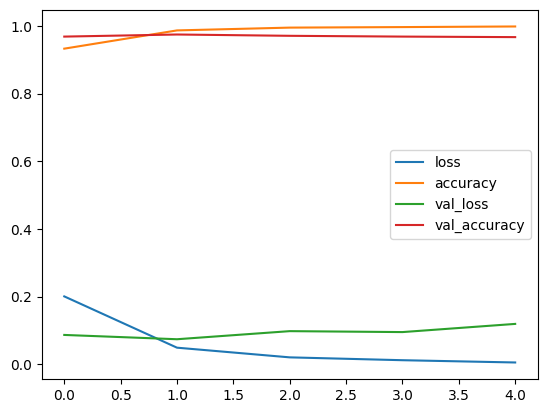

In [27]:
his_1 = bi_lstm_model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))
pd.DataFrame(his_1.history).plot()

In [28]:
evaluate_model(bi_lstm_model,X_test,y_test)

41/41 [==============================] - 3s 33ms/step


{'accuracy': 0.9667440061871616,
 'precision': 0.9836363636363636,
 'recall': 0.9774164408310749,
 'f1-score': 0.9805165382872678}

## Model Performance

In [31]:
mnb_results = evaluate_model(mnb,X_test_vec,y_test)
gnb_results = evaluate_model(gnb,X_test_vec.toarray(),y_test)
bnb_results = evaluate_model(bnb,X_test_vec,y_test)
c_model_results = evaluate_model(c_model,X_test,y_test)
bi_lstm_model_results = evaluate_model(bi_lstm_model,X_test,y_test)

total_results = pd.DataFrame({'MultinomialNB Model':mnb_results,
                              'GaussianNB Model':gnb_results,
                              'BernoulliNB Model':bnb_results,
                              'MultinomialNB Model':mnb_results,
                              'Custom-Vec-Embedding Model':c_model_results,
                              'Bidirectional-LSTM Model':bi_lstm_model_results}).transpose()
total_results

41/41 [==============================] - 3s 62ms/step


,accuracy,precision,recall,f1-score
MultinomialNB Model,0.948956,0.943734,1.000000,0.971053
GaussianNB Model,0.898685,0.971042,0.908762,0.938871
BernoulliNB Model,0.972158,0.969325,0.999097,0.983986
Custom-Vec-Embedding Model,0.977572,0.977837,0.996387,0.987025
Bidirectional-LSTM Model,0.966744,0.983636,0.977416,0.980517


<Axes: >

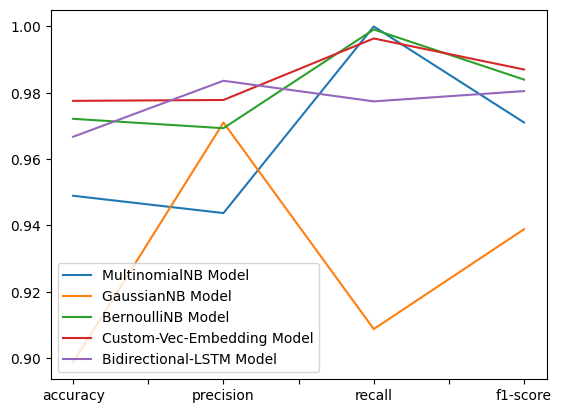

In [32]:
total_results.transpose().plot()